# Modelling Simulation and Optimisation Project

Karan Sachdeva (x18185916@student.ncirl.ie)

Semester 2, Modelling Simulation and Optimisation, Masters in Data Analytics

National College of Ireland

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li>

<li><span><a href="#Parameters" data-toc-modified-id="Parameter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters</a></span><ul class="toc-item"><li><span><a href="#Defined-Parameters" data-toc-modified-id="Defined-Parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Defined Parameters</a></span></li><li><span><a href="#Derived-Parameters" data-toc-modified-id="Derived-Parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Derived Parameters</a></span></li></ul></li>

<li><span><a href="#Logging" data-toc-modified-id="Loggin-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logging</a></span></li>

<li><span><a href="#HS2-Line" data-toc-modified-id="HS2-Line-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>HS2 Line</a></span></li>


<li><span><a href="#Network-Node" data-toc-modified-id="Network-Node-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Network Node</a></span></li>

<li><span><a href="#Train" data-toc-modified-id="Train-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train</a></span></li>

<li><span><a href="#Randomisation-Utility-Functions" data-toc-modified-id="Randomisation-Utility-Functions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Randomisation Utility Functions</a></span></li>
<li><span><a href="#Simulation" data-toc-modified-id="Simulation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Function-for-Simulation-Execution" data-toc-modified-id="Function-for-Simulation-Execution-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Function for Simulation Execution</a></span></li><li><span><a href="#Simulation-Execution-and-Results" data-toc-modified-id="Simulation-Execution-and-Results-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Simulation Execution and Results</a></span></li></ul></li>

<li><span><a href="#Optimization" data-toc-modified-id="Optimization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Preparing-Statistics-for-Optimization-Function" data-toc-modified-id="Preparing-Statistics-for-Optimization-Function-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Preparing Statistics for Optimization Function</a></span></li><li><span><a href="#Stats-Array-Generation for-Monte-Carlo-Optimization-Function" data-toc-modified-id="Stats-Array-Generation for-Monte-Carlo-Optimization-Function-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Stats Array Generation for Monte Carlo Optimization Function</a></span></li>
<li><span><a href="#Setting-Contour-Graph-limits-for-the-Monte-Carlo-Optimization-Function" data-toc-modified-id="Setting-Contour-Graph-limits-for-the-Monte-Carlo-Optimization-Function-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Setting Contour Graph limits for the Monte Carlo Optimization Function</a></span></li>

<li><span><a href="#Monte-Carlo-Optimization" data-toc-modified-id="Monte-Carlo-Optimization-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Monte Carlo Optimization Function</a></span></li>

<li><span><a href="#Solution-1-Minimizing-Overall-Average-Travelling-Time-9.5" data-toc-modified-id="Solution-1-Minimizing-Overall-Average-Travelling-Time-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Solution 1 - Minimizing Overall Average Travelling Time</a></span></li>

<li><span><a href="#Solution-2-Maximise-the-throughput-of-passengers-in-peak-hours" data-toc-modified-id="Solution-2-Maximise-the-throughput-of-passengers-in-peak-hours-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Solution 2 - Maximise the throughput of passengers in peak hours</a></span></li></ul></li>

<li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li>

</ul></div>

#Load Libraries

Importing libraries and downloading Simpy for simulation

In [0]:
!pip install simpy
from enum import Enum
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from math import floor
import numpy as np
import simpy
import simpy.events as evt

#Parameters

##Defined Parameters

In [0]:
#
# Check the maths and the boundary conditions
#
print('\nCheck the speed, acceleration, distance and time calculations')
# acceleration of 0.72m/s2
acc_rate = 0.72

# emergency braking at 2.5m/s2
emergency_brake = 2.5

# energy optimal deceleration (using regenerative braking) is 0.36m/s2
dec_rate = 0.36

# maximum travelling speed of the train is about 300km/h (83.3m/s)
max_speed_kph = 300

max_speed_mps = (max_speed_kph * 1000) / (60 * 60)
print('Max speed %s km/hr in metres / sec : %s' % (max_speed_kph, round(max_speed_mps, 2)))

# accelerating from 0 to the maximum speed takes therefore 115.7s during which time the train travels about 4,820m
max_speed_acc_time = max_speed_mps / acc_rate
print('Max speed acceleration time in seconds : %s' % round(max_speed_acc_time, 2))

max_speed_acc_dist = 0.5 * acc_rate * max_speed_acc_time * max_speed_acc_time
print('Max speed acceleration distance in metres : %s' % round(max_speed_acc_dist, 2))

# slow decelerating takes 231.4s and the distance travelled is 9,640m.
max_speed_dec_time = max_speed_mps / dec_rate
print('Max speed deceleration time in seconds : %s' % round(max_speed_dec_time, 2))

max_speed_dec_dist = 0.5 * dec_rate * max_speed_dec_time * max_speed_dec_time
print('Max speed deceleration distance in metres : %s' % round(max_speed_dec_dist, 2))

# emergency braking
max_speed_emergency_brake_time = max_speed_mps / emergency_brake
print('Max speed emergency brake time in seconds : %s' % round(max_speed_emergency_brake_time, 2))

max_speed_emergency_brake_dist = 0.5 * emergency_brake * max_speed_emergency_brake_time * max_speed_emergency_brake_time
print('Max speed emergency brake distance in metres : %s' % round(max_speed_emergency_brake_dist, 2))

# The length of a block should therefore be at least 10km, but to allow a train to achieve
# and run as long as possible at full speed, the block length should be at least 1.5x this length.
signalling_block_dist = 10000
london_old_oak_common_birmingham_interchange_dist = 145000


Check the speed, acceleration, distance and time calculations
Max speed 300 km/hr in metres / sec : 83.33
Max speed acceleration time in seconds : 115.74
Max speed acceleration distance in metres : 4822.53
Max speed deceleration time in seconds : 231.48
Max speed deceleration distance in metres : 9645.06
Max speed emergency brake time in seconds : 33.33
Max speed emergency brake distance in metres : 1388.89


## Derived Parameters

Accelaration is done from standing position for a certain amount of time at maximum velocity and then decelarate from maximum velocity to standstill position. This happen within a certain distance which is the signalling block length.

$v_{max} = at_a$ where a is the constant acceleration rate, $t_a$ is the time spent accelerating therefore
$t_a = \frac{v_{max}}{a}$

$v_{max} = dt_d$ where d is the constant acceleration rate, $t_d$ is the time spent decelerating therefore
$t_d = \frac{v_{max}}{d}$

$dist = dist_a + dist_d$ where $dist_a$ is the distance travelled accelerating and $dist_d$ is the distance
travelled decelerating

$dist = \frac{1}{2}a{t_a^2} + \frac{1}{2}d{t_d^2}$

$dist = \frac{1}{2}a{(\frac{v_{max}}{a})^2} + \frac{1}{2}d{(\frac{v_{max}}{d})^2}$

$v_{max} = \sqrt\frac{2dist}{(\frac{1}{a} + \frac{1}{d})}$

If signal block length is 10km or 10000m and acceleration is ${0.72m/s^2}$, deceleration is ${0.36m/s^2}$ then the max velocity achievable within the signalling block
is 69.28m/sec or 249.42km/hr

If signal block length is 15km or 15000m and acceleration is ${0.72m/s^2}$, deceleration is ${0.36m/s^2}$ then the max velocity achievable within the signalling block
is 84.85m/sec or 305.47km/hr

In [0]:
# The max velocity achievable over a distance assuming a standing start, constant acceleration to that max velocity
# and then a constant deceleration to a full stop within the distance specified - note that the 300km/hr max
# operating speed is not taken into account
def max_velocity_over_distance(distance):
    """
    :param distance: distance, meters
    :return: maximum velocity achievable in distance
    """

    return math.sqrt((2 * distance) / ((1 / acc_rate) + (1 / dec_rate)))


sig_block_max_velocity = max_velocity_over_distance(signalling_block_dist)
print('Max velocity achieved over signalling block of %s metres : %s metres/sec'
      % (signalling_block_dist, round(sig_block_max_velocity, 2)))
print('Max velocity achieved over signalling block of %s metres : %s km/hr'
      % (signalling_block_dist, round(sig_block_max_velocity * 60 * 60 / 1000, 2)))



Max velocity achieved over signalling block of 10000 metres : 69.28 metres/sec
Max velocity achieved over signalling block of 10000 metres : 249.42 km/hr


In [0]:
# The time to travel the distance specified assuming a standing start, constant acceleration to that max velocity
# time spent travelling at max velocity and then a constant deceleration to a full stop within the distance specified
def time_to_travel_distance(max_velocity, distance):
    """
    :param max_velocity: maximum velocity, m/s
    :param distance: distance, metres
    :return: time in seconds required to travel distance
    """

    acc_time = max_velocity/acc_rate
    acc_distance = 0.5 * acc_rate * acc_time * acc_time

    dec_time = max_velocity/dec_rate
    dec_distance = 0.5 * dec_rate * dec_time * dec_time

    if (acc_distance + dec_distance) > distance:
        achievable_velocity = max_velocity_over_distance(distance)
        return (achievable_velocity/acc_rate) + (achievable_velocity/dec_rate)
    else:
        return acc_time + dec_time + (distance - (acc_distance + dec_distance))/max_velocity


#
# Check the time required to travel the length of a signalling block from a standing start to full stop
#
sig_block_time = time_to_travel_distance(sig_block_max_velocity, signalling_block_dist)
sig_block_time_mins = sig_block_time/60
print('Time required to travel a single signalling block (standing start to full stop) of %s metres : %s seconds'
      % (signalling_block_dist, round(sig_block_time, 2)))
print('Time required to travel signalling block (standing start to full stop) of %s metres : %s minutes'
      % (signalling_block_dist, round(sig_block_time_mins, 2)))

#
# Check the time required to travel LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE from a standing start to full stop
#
longest_seg_time = time_to_travel_distance(max_speed_mps, london_old_oak_common_birmingham_interchange_dist)
print('Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE %s seconds' % round(longest_seg_time, 2))
print('Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE %s minutes' % round(longest_seg_time/60, 2))

Time required to travel a single signalling block (standing start to full stop) of 10000 metres : 288.68 seconds
Time required to travel signalling block (standing start to full stop) of 10000 metres : 4.81 minutes
Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE 1913.61 seconds
Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE 31.89 minutes


#Logging

In [0]:
# Logging utility function
#
class LogLevel(Enum):
    NONE = -1
    ERROR = 0
    WARN = 1
    INFO = 2
    DEBUG = 3


def logger(msg_level, log_message):
    if msg_level.value <= loglevel.value:
        print(log_message)

# HS2 Line

The Line consists of a set of Network Nodes containing Stations and Signalling Blocks

In [0]:
#
# The Line consists of a set of Network Nodes containing Stations and Signalling Blocks
#
class Line(object):
    def __init__(self, sim_env, name, network_nodes):
        self.env = sim_env
        self.name = name
        self.network_nodes = network_nodes

    def run_line(self, num_trains, num_pass, train_stats):
        """

        :param num_trains: the number of trains to simulate
        :param num_pass: the number of passengers per hour to simulate
        :param train_stats: the train simulation statistics
        :return: None
        """
        yield self.env.timeout(0)

        for train_no in range(num_trains):
            train = Train(self.env, 'Train %d' % train_no)
            self.env.process(train.process(self.network_nodes, num_pass, train_stats))


# Network Node

A Network Node can be a Station or a Signalling Block and it can be the first Signalling Block after a Station in
which can the Train is acceleration to max velocity from a standing start or the last Signalling Block before a
Station in which case the Train is decelerating from max velocity to a full stop or neither in which case the Train
is travelling at max velocity for the entire duration of the Signalling Block

In [0]:
class NetworkNodeType(Enum):
    STATION = "STATION"
    SIGNALLING_BLOCK = "SIGNALLING_BLOCK"
#
# A Network Node can be a Station or a Signalling Block and it can be the first Signalling Block after a Station in
# which can the Train is acceleration to max velocity from a standing start or the last Signalling Block before a
# Station in which case the Train is decelerating from max velocity to a full stop or neither in which case the Train
# is travelling at max velocity for the entire duration of the Signalling Block
#
class NetworkNode(object):
    def __init__(self, sim_env, node_name, node_type, first_sig_block, last_sigblock, journey_time):
        self.env = sim_env
        self.name = node_name
        self.type = node_type
        self.first_block = first_sig_block
        self.last_block = last_sigblock
        self.fixed_time = journey_time
        self.access_node = simpy.Resource(self.env, capacity=1)

# Train

The Train can hold two resource requests - one for the current Station or Signalling Block and another for the next
Network Node on the line. The Train can make progress when it holds both access requests.

Run the Train along the Line. In this model accessing a Signalling Block Resource and releasing it represent
transitioning the signal states from GREEN to RED and back again. The model builds in delays in getting a signal
due to (minor) delays with the preceding Train when stopping at a Station and picking up passengers. The
assumption is made that all blocks are travelled at max velocity apart from initial acceleration block and
ultimate deceleration block. Specific "slowing down due to delays" is not modelled and the assumption is made
that the delay in acquiring the signal i.e. Signalling Block or Station resource adequately covers the speed
reduction

In [0]:
#
# The Train can hold two resource requests - one for the current Station or Signalling Block and another for the next
# Network Node on the line. The Train can make progress when it holds both access requests.
#
class Train(object):
    def __init__(self, sim_env, name):
        self.env = sim_env
        self.name = name
        self.access_next_node_req = None
        self.access_prev_node_req = None

    #
    # Run the Train along the Line. In this model accessing a Signalling Block Resource and releasing it represent
    # transitioning the signal states from GREEN to RED and back again. The model builds in delays in getting a signal
    # due to (minor) delays with the preceding Train when stopping at a Station and picking up passengers. The
    # assumption is made that all blocks are travelled at max velocity apart from initial acceleration block and
    # ultimate deceleration block. Specific "slowing down due to delays" is not modelled and the assumption is made
    # that the delay in acquiring the signal i.e. Signalling Block or Station resource adequately covers the speed
    # reduction
    #
    def process(self, network_nodes, no_pass_per_hr, stats_dict):
        """
        :param network_nodes: the list of Network Nodes on the line
        :param no_pass_per_hr: the number of passengers per hour
        :param stats_dict: the train statistics in a Python dictionary where the key is the Train name
        :return: None
        """
        logger(LogLevel.INFO, '%d %s: STARTED' %
               (self.env.now, self.name))
        start_time = None
        num_passengers = 0

        node_index = 0
        for network_node in network_nodes:
            logger(LogLevel.DEBUG, '%s: PROCESSING %s : %s'
                   % (self.name, network_node.name, network_node.type))

            # Request access to the next Network Node
            self.access_next_node_req = network_node.access_node.request()
            yield self.access_next_node_req

            # Record the start time as when access to the first Network Node on the Line is given
            if start_time is None:
                start_time = self.env.now

            logger(LogLevel.DEBUG, '%s: %s (%s) Access given' %
                   (self.name, network_node.type.value, network_node.name))

            # Release access to the previous Network Node
            if node_index > 0:
                prev_node_index = node_index - 1
                prev_node = network_nodes[prev_node_index]
                prev_node.access_node.release(self.access_prev_node_req)

                logger(LogLevel.DEBUG, '%s: %s (%s) Access released' %
                       (prev_node.type.value, prev_node.name, self.name))

                # If the previous Network Node is a Station then this is a Departure
                if prev_node.type == NetworkNodeType.STATION:
                    logger(LogLevel.INFO, '%d %s: DEPARTURE: %s' %
                           (self.env.now, prev_node.name, self.name))

            # If the next/current Network Node is a Station then this is an Arrival and the Train stops
            # to collect passengers
            if network_node.type == NetworkNodeType.STATION:
                logger(LogLevel.INFO, '%d %s: ARRIVAL: %s' %
                       (self.env.now, self.name, network_node.name))

                stop_time, num_passengers_on = \
                    gen_stop_time(node_index == 0, node_index == len(network_nodes)-1, no_pass_per_hr)

                num_passengers += num_passengers_on

                logger(LogLevel.INFO, '%s: STOPPING for %d for passengers at %s' %
                       (self.name, stop_time, network_node.name))

                yield self.env.timeout(stop_time)

            # Otherwise the Train travels the Signalling Block and the travel time depends on whether it is
            # accelerating, travelling at max velocity or decelerating
            else:
                travel_time = gen_travel_time(
                    network_node.first_block,
                    network_node.last_block,
                    network_node.fixed_time
                )

                logger(LogLevel.INFO, '%s: TRAVELLING for %d at %s' %
                       (self.name, travel_time, network_node.name))

                yield self.env.timeout(travel_time)

            node_index += 1

            # If the Train has reached the last Network Node (always a Station) then release access to the Station
            # and finish
            if node_index == len(network_nodes):
                # Release the last station and finish
                network_node.access_node.release(self.access_next_node_req)

                logger(LogLevel.DEBUG, '%s: %s (%s) Access released' %
                       (self.name, network_node.type.value, network_node.name))

            else:
                self.access_prev_node_req = self.access_next_node_req
                self.access_next_node_req = None

        # Calculate the stats on the journey time of the Train
        end_time = self.env.now
        logger(LogLevel.INFO, '%d %s: FINISHED' % (self.env.now, self.name))
        overall_journey_time = end_time - start_time
        stats_dict[self.name] = (start_time, overall_journey_time, num_passengers)

# Randomisation Utility Functions

In [0]:
#
# Assume a Poisson distribution on the number of passengers arriving for each train based on an hourly rate
#
def gen_stop_time(
        first_stop,
        last_stop,
        no_pass_per_hr,
        trains_per_hr=15,
        train_len=200,
        train_capacity=420,
        train_occ=0.7,
        embark_rate=1.0
):
    """
    :param first_stop: whether the station is the first stop on the line
    :param last_stop: whether the station is the last stop on the line
    :param no_pass_per_hr: the number of passengers per hour
    :param trains_per_hr: the number of trains per hour
    :param train_len: the total length of the train
    :param train_capacity: the train capacity in terms of passengers
    :param train_occ: the train occupancy rate
    :param embark_rate: the number of passengers embarking/disembarking per second at a stop
    :return: the total wait time in minutes
    """
    num_passengers_on = 0

    # Assume each carriage is 20m
    carriage_len = 20
    no_of_carriages = floor(train_len/carriage_len)

    if first_stop:
        num_passengers_on = floor(train_capacity * train_occ)

    if first_stop or last_stop:
        total_wait_time = (((train_capacity * train_occ) / no_of_carriages) * embark_rate)/60
    else:
        num_passengers_on = np.random.poisson(lam=no_pass_per_hr/trains_per_hr)
        num_passengers_off = np.random.poisson(lam=no_pass_per_hr/trains_per_hr)

        free_space = (train_capacity - floor(train_capacity * train_occ)) + num_passengers_off
        if free_space < num_passengers_on:
            num_passengers_on = free_space

        time_passengers_off = num_passengers_off/no_of_carriages * embark_rate

        time_passengers_on = num_passengers_on/no_of_carriages * embark_rate

        total_wait_time = (time_passengers_off + time_passengers_on)/60

    return stats.expon(loc=total_wait_time, scale=total_wait_time * 0.3).rvs(), num_passengers_on

In [0]:
# The Train travels the Signalling Block and the travel time depends on whether it is
# accelerating, travelling at max velocity or decelerating. There are fixed times specified between the first two and
# last two stations
def gen_travel_time(is_acc_block, is_dec_block, fixed_time):
    """
    :param is_acc_block: whether the Network Node is an acceleration block i.e. first Signalling Block after a Station
    :param is_dec_block: whether the Network Node is an deceleration block i.e. last Signalling Block before a Station
    :param fixed_time: whether the Network Node is a Signalling Block with a fixed transit time
    :return: the actual journey time predicted by a Normal distribution
    """
    if fixed_time is not None:
        journey_time = fixed_time
    elif is_acc_block:
        journey_time = acc_block_time()
    elif is_dec_block:
        journey_time = dec_block_time()
    else:
        journey_time = (signalling_block_dist/max_speed_mps)/60

    # The assumption is made that using the variability in journey time below accounts for minor delays and weather
    # The assumption is also made that major incidents will cause unrecoverable delays and are hence not modelled for
    # the purposes of optimisation
    actual_journey_time = stats.expon(loc=journey_time, scale=journey_time * 0.1).rvs()
    return actual_journey_time


# Calculate the time taken to transit an acceleration Signalling Block
def acc_block_time():
    start_block_time = max_speed_acc_time + (signalling_block_dist - max_speed_acc_dist) / max_speed_mps
    return start_block_time/60


# Calculate the time taken to transit an deceleration Signalling Block
def dec_block_time():
    end_block_time = max_speed_dec_time + (signalling_block_dist - max_speed_dec_dist) / max_speed_mps
    return end_block_time/60

# Simulation

## Function for Simulation Execution

Start the object construction here beginning with Signalling Blocks and Stations which are then assigned to Tracks

Next comes the Trains themselves and the Line is constructed from the Tracks and Trains

The simulation is initiated by "running" the Line in the context of the SimPy environment

In [0]:
def run_simulation(num_trains, num_passengers, sig_block_dist, train_stats_times):
    """
    :param num_trains: the number of trains to simulate
    :param num_passengers: the number of passengers to simulate
    :param sig_block_dist: the signalling block distance to use in the simulation
    :param train_stats_times: the train statistics to gather during the simulation
    :return: None
    """
    
    env = simpy.Environment()

    # Calculate the number of Signalling Blocks between LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE
    sig_num = floor(london_old_oak_common_birmingham_interchange_dist/sig_block_dist)

    # Build the Network Node list
    network = [NetworkNode(env, 'LONDON EUSTON',
                           NetworkNodeType.STATION, False, False, None)]

    network.extend([NetworkNode(env, 'LONDON EUSTON - LONDON OLD OAK COMMON',
                                NetworkNodeType.SIGNALLING_BLOCK, True, True, 5)])

    network.extend([NetworkNode(env, 'LONDON OLD OAK COMMON',
                                NetworkNodeType.STATION, False, False, None)])

    network.extend([NetworkNode(env, 'LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (%s)' % 0,
                                NetworkNodeType.SIGNALLING_BLOCK, True, False, None)])

    for i in range(1, sig_num-1):
        network.extend([NetworkNode(env, 'LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (%s)' % i,
                                    NetworkNodeType.SIGNALLING_BLOCK, False, False, None)])

    network.extend([NetworkNode(env, 'LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (%s)' % (sig_num-1),
                                NetworkNodeType.SIGNALLING_BLOCK, False, True, None)])

    network.extend([NetworkNode(env, 'BIRMINGHAM INTERCHANGE',
                                NetworkNodeType.STATION, False, False, None)])

    network.extend([NetworkNode(env, 'BIRMINGHAM INTERCHANGE - BIRMINGHAM CURZON STREET (0)',
                                NetworkNodeType.SIGNALLING_BLOCK, True, False, 4)])
    network.extend([NetworkNode(env, 'BIRMINGHAM INTERCHANGE - BIRMINGHAM CURZON STREET (1)',
                                NetworkNodeType.SIGNALLING_BLOCK, False, True, 5)])

    network.extend([NetworkNode(env, 'BIRMINGHAM CURZON STREET',
                                NetworkNodeType.STATION, False, False, None)])

    print('\n\nRail Network')
    for node in network:
        print('%s : %s' % (node.name, node.type))
    line = Line(env, 'HS2', network)

    print('\n\nRunning %s Line Simulation\n' % line.name)
    env.process(line.run_line(num_trains, num_passengers, train_stats_times))
    env.run()

## Simulation Execution and Results
The distance between two signalling blocks is kept as 15km. Hence, there would be 9 signalling blocks between London Old Oak common and Birmingham Interchange Station. Assuming passenger footfall of 4000 and number of trains operating in this line is 15. Approximately 11 trains start within a hour.

In [0]:
loglevel = LogLevel.INFO # Defining debug log defination at global level. All objects are called within run_simulation block.
no_of_trains = 15
no_of_passengers_per_hour = 4000
sig_block_len = 15000
train_stats_times = {}
run_simulation(no_of_trains, no_of_passengers_per_hour, sig_block_len, train_stats_times)



Rail Network
LONDON EUSTON : NetworkNodeType.STATION
LONDON EUSTON - LONDON OLD OAK COMMON : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON : NetworkNodeType.STATION
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (0) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (1) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (2) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (3) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (4) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (5) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (6) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (7) : NetworkNodeType.SIGNALLING_BLOCK
LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (8) : NetworkNodeType.SIGNALLING_BLOCK
BIRMINGHAM INTERCHANGE : NetworkNodeType.STATION
B

# Optimization

##Preparing statistics for Optimization function
The data obtained from simulation function obtained on particular number of trains and passenger is stored in a dataframe and used as input to optimize the problem.

Streaming output truncated to the last 5000 lines.
Train 8: STOPPING for 1 for passengers at BIRMINGHAM INTERCHANGE
Train 13: TRAVELLING for 2 at LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (17)
Train 9: TRAVELLING for 4 at LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (28)
Train 10: TRAVELLING for 2 at LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (25)
Train 14: TRAVELLING for 2 at LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (16)
Train 11: TRAVELLING for 2 at LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (23)
Train 12: TRAVELLING for 2 at LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE (20)
119 Train 6: ARRIVAL: BIRMINGHAM CURZON STREET
Train 6: STOPPING for 0 for passengers at BIRMINGHAM CURZON STREET
Train 7: TRAVELLING for 6 at BIRMINGHAM INTERCHANGE - BIRMINGHAM CURZON STREET (1)
119 BIRMINGHAM INTERCHANGE: DEPARTURE: Train 8
Train 8: TRAVELLING for 4 at BIRMINGHAM INTERCHANGE - BIRMINGHAM CURZON STREET (0)
Train 13: TRAVELLING for 2 at LONDON OLD OAK COMMON - BIRMINGHAM I

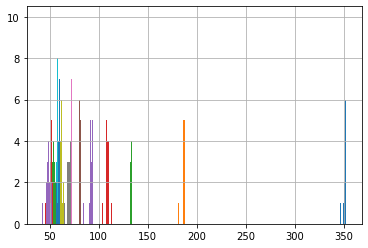

In [0]:
def f(stats_array, x, y):
    """
    :param stats_array: An array of values for which an optimum is sought
    :param x: the x axis of the array i.e. columns
    :param y: the y axis of the array i.e. rows
    :return: the value at position x, y
    """
    return stats_array[x-1, y-1]

no_of_trains = 15 #Predefined condition for optimzation
no_of_passengers_per_hour = 4000 #Predefined condition for optimization for 15 trains. 420 person per train

min_sig_block = 1000
max_sig_block = 15000
sig_block_step = 1000

# Run the simulation and gather the stats for journey for each block length by number of trains in dataframes below
overall_start_time_offsets_stats_df = pd.DataFrame()
overall_journey_time_stats_df = pd.DataFrame()
overall_passenger_stats_df = pd.DataFrame()
overall_journey_time_adjusted_stats_df = pd.DataFrame()
overall_journey_time_adjusted_stats2_df = pd.DataFrame()

# distribution of average overall travelling time. Used to determine the optimal value used for input in optimization functions.
for sig_block_len in range(min_sig_block, max_sig_block + sig_block_step, sig_block_step):
    train_stats_times = {}

    run_simulation(no_of_trains, no_of_passengers_per_hour, sig_block_len, train_stats_times)
    # Take the journey time stats for the simulation and plot as a 10-bin histogram
    train_stats_journey_time_df = pd.DataFrame.from_dict(train_stats_times, orient='index')
    train_stats_journey_time_df.columns = ['StartTime', 'JourneyTime', 'NoPassengers']
    train_stats_journey_time_df['JourneyTime'].hist(bins=10)

    #plt.xlabel('Journey Time (mins)')
    #plt.title('Train Journey Times / Sig Block %sm' % sig_block_dist)
    #plt.show()
    train_stats_df = pd.DataFrame.from_dict(train_stats_times, orient='index').T

    # The first row represents the absolute start times - calculate the offsets with respect to previous train
    train_stats_df.iloc[0] = train_stats_df.iloc[0].diff()

    # Multiply this offset by the journey time in the second row to produce our Mand add another row
    # to the data frame
    tmp = train_stats_df.iloc[0].mul(train_stats_df.iloc[1])
    train_stats_df = train_stats_df.append(tmp, ignore_index=True)

    # Divide the journey time in the second row by the passenger numbers in the third row and add another row
    # to the data frame
    tmp = train_stats_df.iloc[1].div(train_stats_df.iloc[2])
    train_stats_df = train_stats_df.append(tmp, ignore_index=True)

    # Add an index column representing the signalling block length
    train_stats_df.insert(0, 'SigBlockLength', sig_block_len)

    # Break up the data frame into individual statistic types
    overall_start_time_offsets_stats_df = \
        overall_start_time_offsets_stats_df.append(train_stats_df.iloc[0], ignore_index=True)

    overall_journey_time_stats_df = \
        overall_journey_time_stats_df.append(train_stats_df.iloc[1], ignore_index=True)

    overall_passenger_stats_df = \
        overall_passenger_stats_df.append(train_stats_df.iloc[2], ignore_index=True)

    overall_journey_time_adjusted_stats_df = \
        overall_journey_time_adjusted_stats_df.append(train_stats_df.iloc[3], ignore_index=True)

    overall_journey_time_adjusted_stats2_df = \
        overall_journey_time_adjusted_stats2_df.append(train_stats_df.iloc[3], ignore_index=True)

## Stats Array Generation for Monte Carlo Optimization Function

In [0]:
# Manipulate the Pandas data frames into a Numpy array for processing by the optimisation function
overall_journey_time_stats_df = overall_journey_time_stats_df.set_index('SigBlockLength')
overall_journey_time_stats_df = overall_journey_time_stats_df.reset_index()
overall_journey_time_stats_df = overall_journey_time_stats_df.drop('SigBlockLength', axis=1)
overall_journey_time_stats_array = overall_journey_time_stats_df.to_numpy()

overall_start_time_offsets_stats_df = overall_start_time_offsets_stats_df.set_index('SigBlockLength')
overall_start_time_offsets_stats_df = overall_start_time_offsets_stats_df.reset_index()
overall_start_time_offsets_stats_df = overall_start_time_offsets_stats_df.drop('SigBlockLength', axis=1)
overall_start_time_offsets_stats_array = overall_start_time_offsets_stats_df.to_numpy()

overall_passenger_stats_df = overall_passenger_stats_df.set_index('SigBlockLength')
overall_passenger_stats_df = overall_passenger_stats_df.reset_index()
overall_passenger_stats_df = overall_passenger_stats_df.drop('SigBlockLength', axis=1)
overall_passenger_stats_array = overall_passenger_stats_df.to_numpy()

# This adjusted stat is the product of the journey time and time offset from the previous train (waiting time)
# This will be optimised in terms of finding a minimum
overall_journey_time_adjusted_stats_df = overall_journey_time_adjusted_stats_df.set_index('SigBlockLength')
overall_journey_time_adjusted_stats_df = overall_journey_time_adjusted_stats_df.reset_index()
overall_journey_time_adjusted_stats_df = overall_journey_time_adjusted_stats_df.drop('SigBlockLength', axis=1)
overall_journey_time_adjusted_stats_array = overall_journey_time_adjusted_stats_df.to_numpy()

# This adjusted stat is the quotient of the journey time and passengers carried
# This will be optimised in terms of finding a minimum
overall_journey_time_adjusted_stats2_df = overall_journey_time_adjusted_stats2_df.set_index('SigBlockLength')
overall_journey_time_adjusted_stats2_df = overall_journey_time_adjusted_stats2_df.reset_index()
overall_journey_time_adjusted_stats2_df = overall_journey_time_adjusted_stats2_df.drop('SigBlockLength', axis=1)
overall_journey_time_adjusted_stats2_array = overall_journey_time_adjusted_stats2_df.to_numpy()

## Setting Contour Graph limits for the Monte Carlo Optimization Function

In [0]:
import random
# Set the graph limits
x_min = 1
x_max = 15
y_min = 1
y_max = no_of_trains

#
# Set the random seed to different values to observe different behaviours
#
random.seed(740)

##Monte Carlo Optimization Function
Statistics are obtained from function above(f) where simulation is performed and statistics are saved in dataframe, and it is executed in function below over 20, 40 and 50 iterations to get the optimal statistics for metric constraint given. 

In [0]:
def monte_carlo(title, opt_stats_arr, xmin, xmax, ymin, ymax, n): 
# optimization using monte carlo function. 
#The inputs to this optimization function are from dataframe from simulation block.
    """
    :param title: The title of the graph
    :param opt_stats_arr: the array containing the values for which an optimum is sought
    :param xmin: the minimum x value of the grid
    :param xmax: the maximum x value of the grid
    :param ymin: the minimum y value of the grid
    :param ymax: the maximum y value of the grid
    :param n: the number of attempts/hops to make to find an optimum value
    :return: the number of hops taken, the (x,y) location of the optimum value and the optimum value itself
    """
    logger(LogLevel.INFO, '\n\nCalculating Monte Carlo Optimisation (n=%s)' % n)
    x = [random.randint(xmin, xmax) for i in range(n)]
    y = [random.randint(ymin, ymax) for i in range(n)]

    xp = [x[0]]
    yp = [y[0]]
    fmin = f(opt_stats_arr, xp[0], yp[0])

    for i in range(1, len(x)):
        fi = f(opt_stats_arr, x[i], y[i])

        if fi < fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi

    xs = np.linspace(xmin, xmax, xmax)
    ys = np.linspace(ymin, ymax, ymax)

    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)

    cs = ax.contourf(xs, ys, opt_stats_arr.T, 30)
    fig.colorbar(cs, ax=ax)

    ax.scatter(x, y, c='red', marker='.')
    ax.plot(xp, yp, c='red', lw=1)
    ax.plot(xp[-1], yp[-1], marker='X', c='yellow')

    ax.set_title(title % n)
    ax.set_xlabel('Length of Signalling Blocks (km)')
    ax.set_ylabel('Number of Trains')
    

    plt.show()

    ret_val = len(xp), xp[-1], round(f(opt_stats_arr, xp[-1], yp[-1]), 2)
    logger(LogLevel.INFO, 'hops: %s, k=%s, metric=%s' % ret_val)
    return ret_val

## Solution 1 - Minimizing Overall Average Travelling Time



Calculating Monte Carlo Optimisation (n=20)


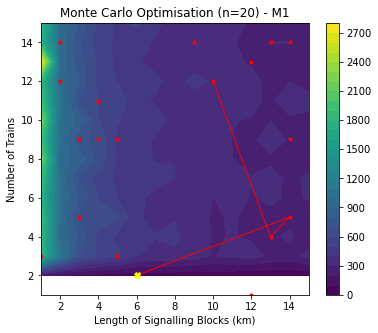

hops: 4, k=6, metric=44.97


Calculating Monte Carlo Optimisation (n=40)


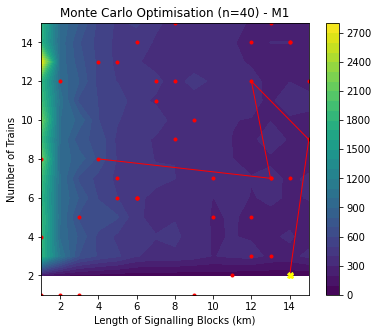

hops: 5, k=14, metric=29.12


Calculating Monte Carlo Optimisation (n=50)


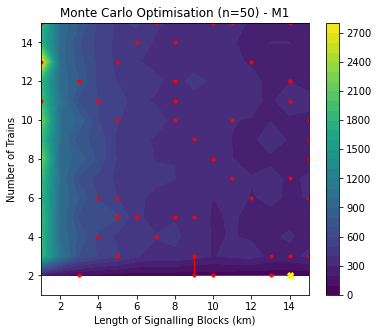

hops: 4, k=14, metric=29.12


(4, 14, 29.12)

In [0]:
# The overall traveling time is optimized (minimized) as seen in the below figures which is calculated from the waiting time for
# the next train and the actual traveling time until arrival of the train. Three cases for the number  
# of iterations which are 20, 40 and 50 are considered.


monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            overall_journey_time_adjusted_stats_array, x_min, x_max, y_min, y_max, 20)
monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            overall_journey_time_adjusted_stats_array, x_min, x_max, y_min, y_max, 40)
monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            overall_journey_time_adjusted_stats_array, x_min, x_max, y_min, y_max, 50)


##Solution 2 - Maximise the throughput of passengers in peak hours



Calculating Monte Carlo Optimisation (n=20)


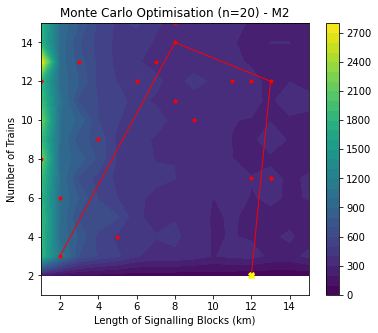

hops: 4, k=12, metric=26.21


Calculating Monte Carlo Optimisation (n=40)


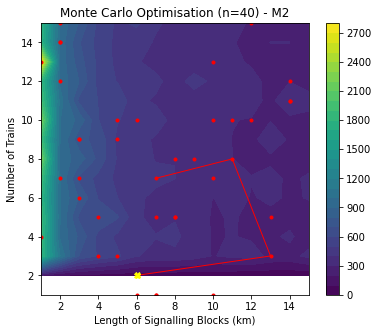

hops: 4, k=6, metric=44.97


Calculating Monte Carlo Optimisation (n=50)


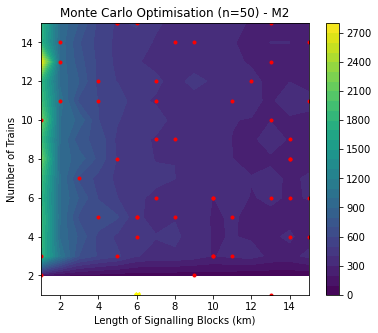

hops: 1, k=6, metric=nan


(1, 6, nan)

In [0]:
# The throughput of passengers during peak hours has been optimized (maximized) as seen in the below figuers. Three cases for the number  
# of iterations which are 20, 40 and 50 are considered.

monte_carlo('Monte Carlo Optimisation (n=%s) - M2',
            overall_journey_time_adjusted_stats2_array, x_min, x_max, y_min, y_max, 20)
monte_carlo('Monte Carlo Optimisation (n=%s) - M2',
            overall_journey_time_adjusted_stats2_array, x_min, x_max, y_min, y_max, 40)
monte_carlo('Monte Carlo Optimisation (n=%s) - M2',
            overall_journey_time_adjusted_stats2_array, x_min, x_max, y_min, y_max, 50)

## References

[1] I. A. Hansen, ‘Station capacity and stability of train operations’,
Computers in Railways VII, vol. 7, pp. 809–816, Jan. 2000

[2] P. Connor, ‘High Speed Railway Capacity - Understanding the factors affecting capacity limits for a high speed railway'
 Available: http://www.railway-technical.com/books-papers--articles/high-speed-railway-capacity.pdf

[3] H. Pouryousef, P. Lautala, and T. White, ‘Railroad capacity tools and methodologies in the U.S. and Europe’,
Journal of Modern Transportation, vol. 23, Mar. 2015, doi: 10.1007/s40534-015-0069-z

[4] 	A. B. Downey, "Green Tree Press, Modeling and Simulation in Python," [Online]. Available: http://greenteapress.com/modsimpy/ModSimPy3.pdf. [Accessed May 2020].

[5] L. Dai, ‘A machine learning approach for optimisation in railway planning’, 2018,
 Available: https://repository.tudelft.nl/islandora/object/uuid%3A20170a8c-7e1e-434f-b5d6-9ba933e2ab6e [Accessed 07 05 2020].
 
[6] N. C. O. Ireland, "Modelling, Simulation and Optimization," [Online]. Available: https://moodle.ncirl.ie/course/view.php?id=1395. [Accessed 07 05 2020].

[7] T. Weise, "Global Optimization Algorithms–Theory and Application," [Online]. Available: http://www.it-weise.de/projects/book.pdf. [Accessed May 2020].

[8] A. Borshchev, "The Big Book of Simulation Modeling," Simulation Modeling with Anylogic: Agent Based, Discrete Event and System Dynamics Methods, pp. 1-20, 2013. 

[9] A. Lecchini, W. Glover, J. Lygeros and J. Maciejowski, "Monte Carlo optimisation for conflict resolution in air traffic control," Lecture Notes in Control and Information Sciences, no. 337, p. 257–276, 2006. 

[10] J. F. Cordeau, P. Toth and D. Vigo, "A survey of optimization models for train routing and scheduling," Transportation Science., vol. 32, pp. 380-404, 1998. 

[11] Y. H. Chang, C. H. Yeh and C. C. Shen, "A multiobjective model for passenger train services planning: application to Taiwan's high-speed rail line," Transportation Research Part B: Methodological, vol. 34, no. 2, pp. 91-106, 2000. 

[12] G. Elert, "The Physics Hypertextbook," [Online]. Available: https://physics.info/. [Accessed May 2020].

[13] 	A. University, "Physics Formula Sheet," [Online]. Available: https://www.andrews.edu/~rwright/physics/Physics%20Formula%20Sheet.pdf. [Accessed April 2020].